In [1]:
import cv2
import matplotlib.pyplot as plt

from lane_following import process_image

[[[ 768  957  795 1077]]

 [[ 797  752  962 1077]]

 [[1360  791 1467  835]]

 [[ 992  642 1298  765]]

 [[1287  760 1390  803]]

 [[ 715  727  785 1030]]

 [[ 390  306  508  312]]]
Lanes found.


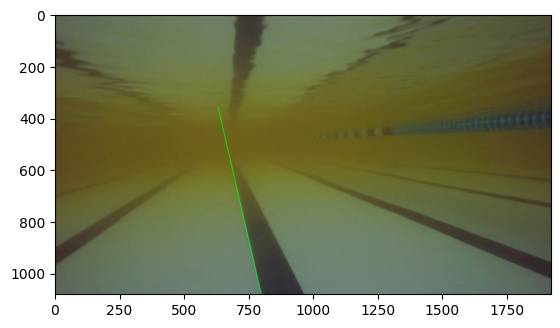

[[[ 789  719  833 1077]]

 [[1160  511 1402  608]]

 [[ 895  703 1040 1046]]

 [[1351  587 1436  621]]

 [[1417  612 1558  671]]

 [[ 141  745  433  548]]

 [[1121  496 1367  595]]

 [[ 817  508  908  733]]

 [[1557  670 1734  745]]

 [[ 767  554  791  743]]

 [[ 139  747  437  546]]]
Lanes found.


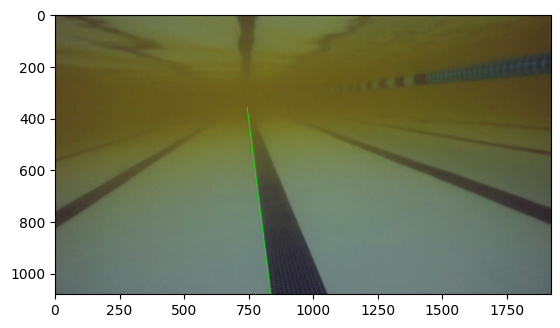

[[[1210  397 1798  500]]

 [[ 707  909  801  561]]

 [[ 917  564  990  903]]

 [[ 894  456  962  777]]

 [[ 351  547  597  448]]

 [[ 966  788 1028 1079]]

 [[  15  697  242  596]]

 [[1529  454 1659  477]]

 [[ 295  571  627  437]]

 [[ 666 1055  704  916]]

 [[1133  382 1208  395]]]
Lanes found.


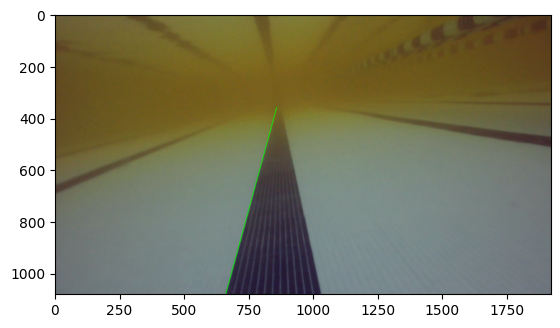

[[[1452  578 1605  595]]

 [[ 590 1079  632  598]]

 [[1073  538 1463  579]]

 [[1267  533 1524  550]]

 [[ 456  776  539  647]]

 [[ 261 1078  337  961]]

 [[1606  596 1892  627]]

 [[1553  552 1805  565]]

 [[1125  523 1438  545]]

 [[ 610  846  628  640]]

 [[1004  509 1304  483]]

 [[1011  507 1306  481]]

 [[1574  511 1797  554]]

 [[ 360  929  453  781]]

 [[1003  510 1304  484]]

 [[1377  474 1798  555]]

 [[ 226  162  350  192]]

 [[1313  471 1600  522]]

 [[ 795  515  918  519]]]
Lanes found.


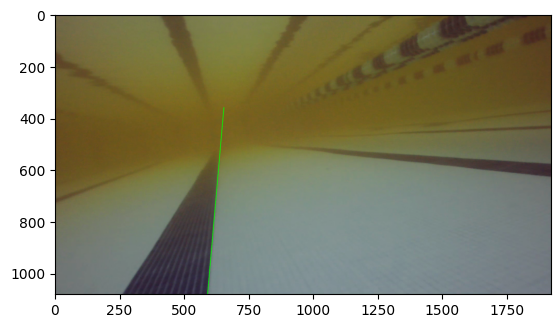

[[[1088  627 1209 1079]]

 [[ 189  692  405  625]]

 [[ 797 1079  898  802]]

 [[ 229  652  442  594]]

 [[   0  714  328  626]]

 [[1381  486 1644  523]]

 [[  45  737  298  659]]

 [[ 497  595  739  521]]

 [[ 663  545  790  507]]

 [[ 969  611 1005  510]]

 [[ 216  605  630  524]]

 [[ 936  703  967  621]]

 [[1594  515 1838  558]]

 [[ 423  599  686  524]]

 [[ 606  562  744  520]]

 [[ 883  846  923  738]]

 [[ 302  589  527  542]]]
Lanes found.


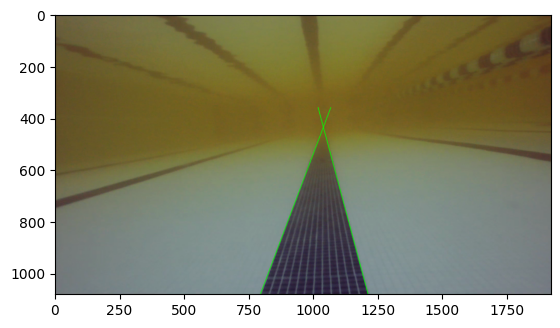

[[[ 873  587  943 1035]]

 [[1245  535 1551  567]]

 [[ 135  707  282  664]]

 [[1421  573 1772  622]]

 [[ 228  679  577  579]]

 [[1073  527 1293  557]]

 [[ 573 1069  641  930]]

 [[1682  580 1838  596]]

 [[1777  624 1907  643]]

 [[ 925  923  948 1074]]

 [[ 691  822  767  673]]

 [[1224  532 1501  542]]

 [[   1  748  157  701]]

 [[1478  559 1804  593]]

 [[1560  548 1661  564]]

 [[1168  541 1398  570]]]
Lanes found.


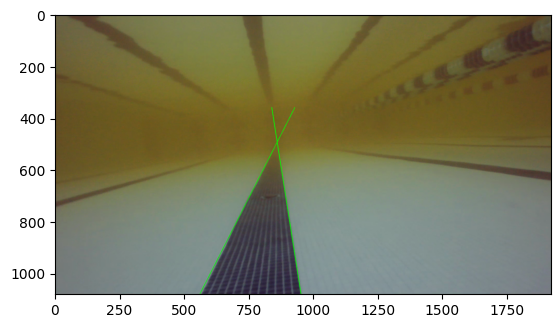

[[[1472  461 1586  464]]

 [[1828  474 1919  478]]

 [[ 111  977  254  861]]

 [[1541  437 1899  431]]

 [[ 461  992  604  734]]

 [[1558  463 1665  466]]

 [[ 191  911  313  812]]

 [[1785  472 1890  476]]

 [[1609  464 1755  469]]

 [[ 535  630  645  530]]

 [[ 325  805  430  723]]

 [[ 620  711  731  494]]

 [[1150  450 1243  454]]

 [[ 279  585  397  549]]

 [[ 843  448  947  439]]

 [[1142  435 1357  438]]

 [[1272  412 1346  403]]

 [[1211  415 1346  401]]

 [[  11 1055  106  979]]

 [[1095  433 1346  402]]

 [[  25  664  138  629]]

 [[ 471  688  613  560]]

 [[1459  383 1902  421]]

 [[1358  438 1412  437]]

 [[ 436 1040  468  981]]

 [[1684  403 1784  412]]]
Lanes found.


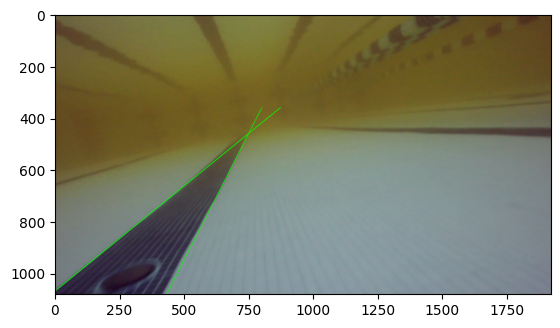

KeyboardInterrupt: 

In [2]:
vcap = cv2.VideoCapture("AUV_Vid.mkv")

out = cv2.VideoWriter("guidance.avi", cv2.VideoWriter_fourcc(*"DIVX"), 1, (1920, 1080))

while True:
    ret, img = vcap.read()

    if not ret:
        break

    img = process_image(img)

    out.write(img)

out.release()